In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("dataset/watson_healthcare_modified.csv")

In [3]:
df.shape

(1676, 35)

In [4]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df=df.drop_duplicates()
df= df.drop(["EmployeeID","Over18","EmployeeCount","StandardHours"],axis = 1)

In [7]:
df.shape

(1676, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1675
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1676 non-null   int64 
 1   Attrition                 1676 non-null   object
 2   BusinessTravel            1676 non-null   object
 3   DailyRate                 1676 non-null   int64 
 4   Department                1676 non-null   object
 5   DistanceFromHome          1676 non-null   int64 
 6   Education                 1676 non-null   int64 
 7   EducationField            1676 non-null   object
 8   EnvironmentSatisfaction   1676 non-null   int64 
 9   Gender                    1676 non-null   object
 10  HourlyRate                1676 non-null   int64 
 11  JobInvolvement            1676 non-null   int64 
 12  JobLevel                  1676 non-null   int64 
 13  JobRole                   1676 non-null   object
 14  JobSatisfaction         

In [9]:
df['Attrition'].value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

In [12]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)

# for col in num_col:
#     sns.boxplot(data=df[col])
#     plt.show()

# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# print("Number of rows after removing outliers: ", df.shape[0])

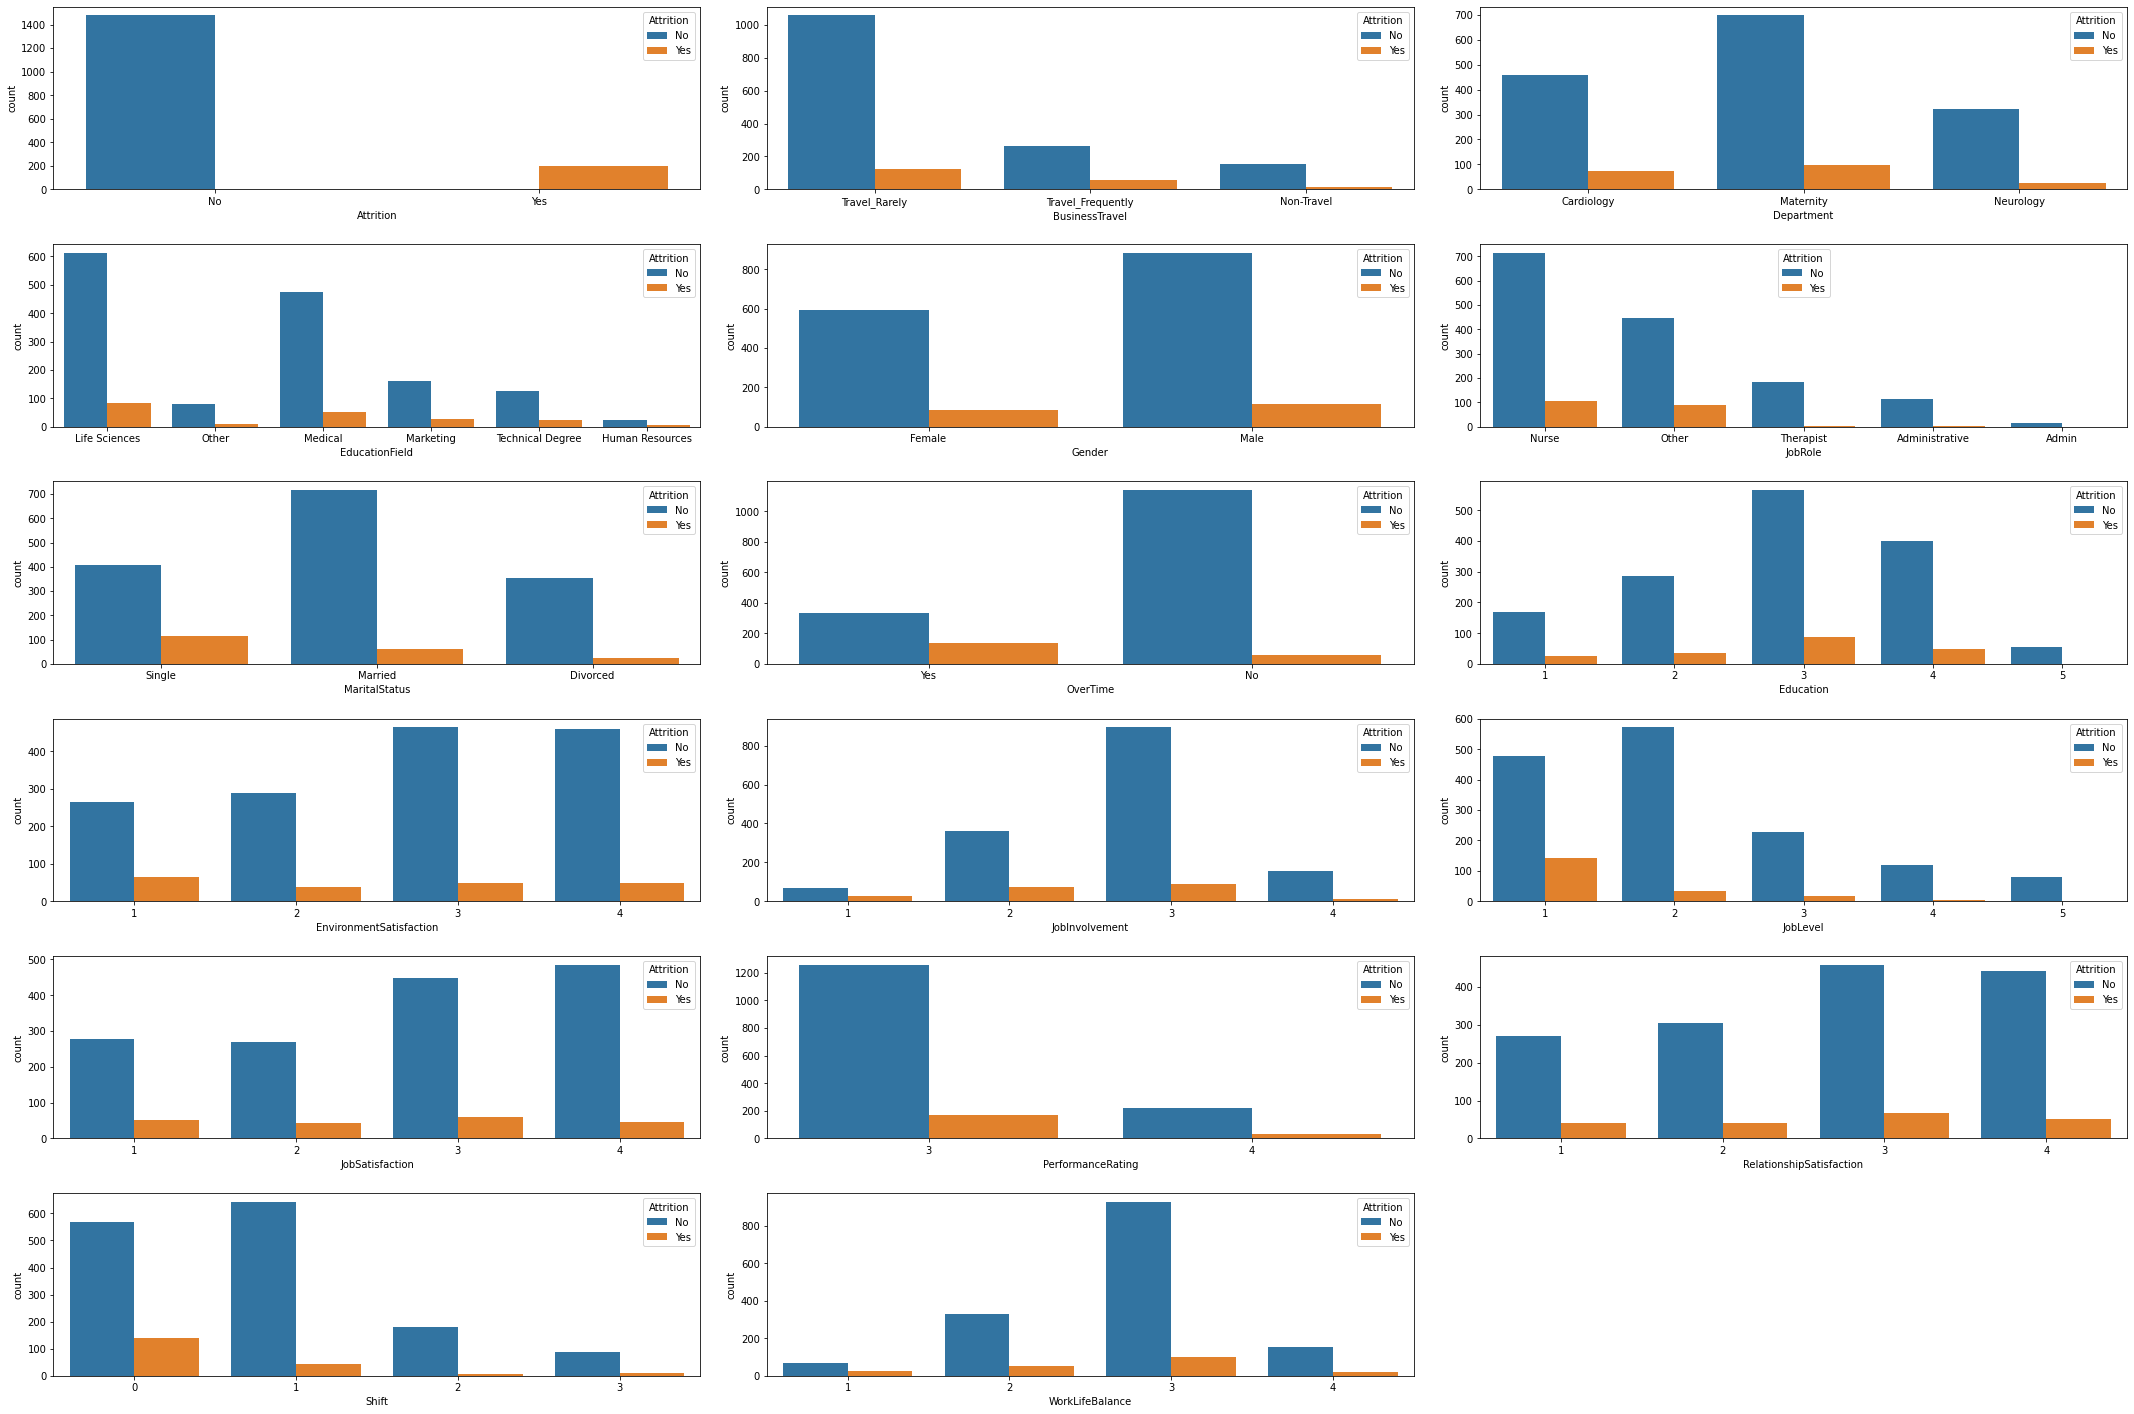

In [13]:
a = df[['Attrition','BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'OverTime','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','Shift','WorkLifeBalance']]

plt.figure(figsize=(30,20))
for index,column in enumerate(a):
    plt.subplot(6,3,index+1)
    sns.countplot(data=a, x=column, hue=df.Attrition)
    
plt.tight_layout(pad = 2.0)

<AxesSubplot:>

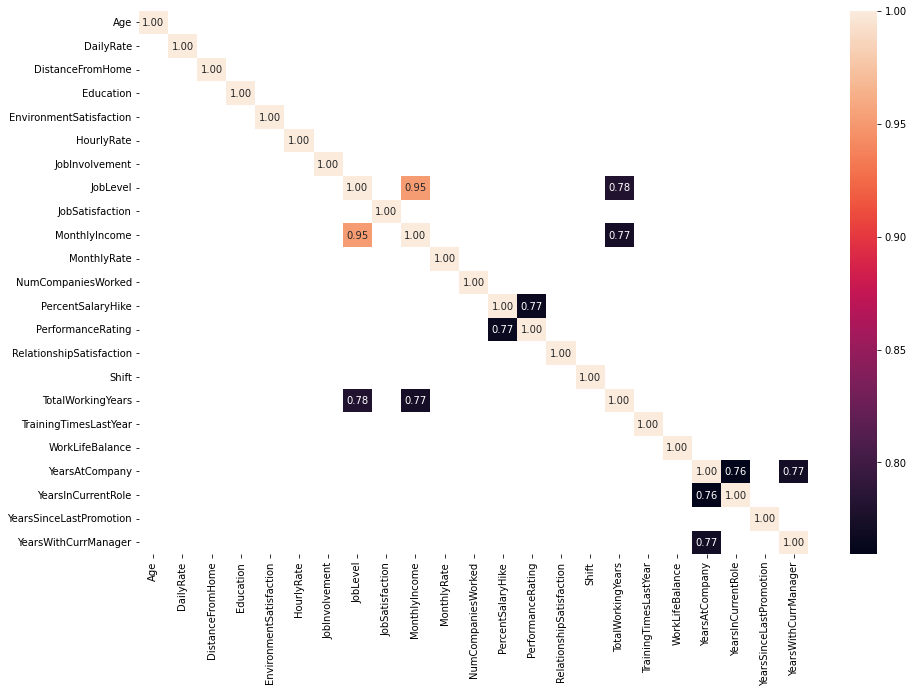

In [22]:
correlation = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation,mask = correlation < 0.75,annot=True, fmt='0.2f')

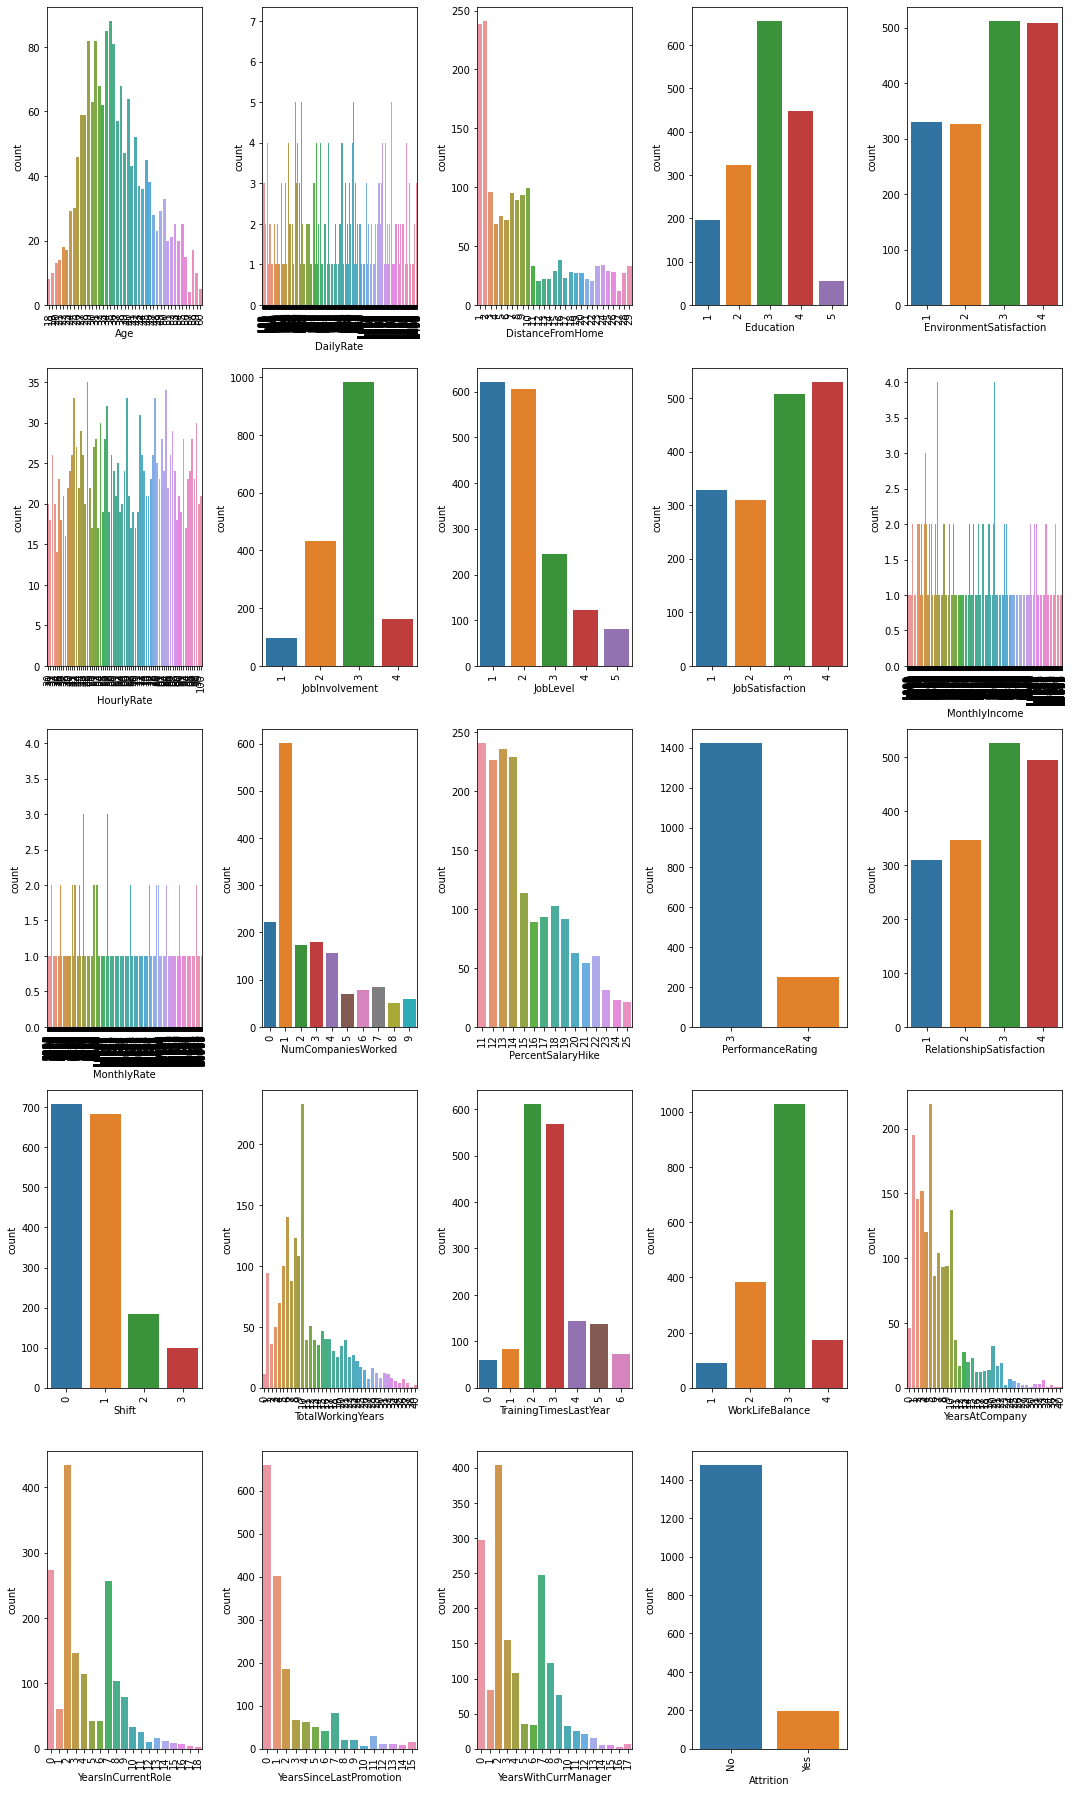

In [18]:
plt.figure(figsize=(15,25))
for index,column in enumerate(num_col):
    plt.subplot(5,5,index+1)
    sns.countplot(data=num_col,x=column)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

C:\Users\asus\AppData\Local\Temp/ipykernel_32800/3642029601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_col["Attrition"] = df.Attrition


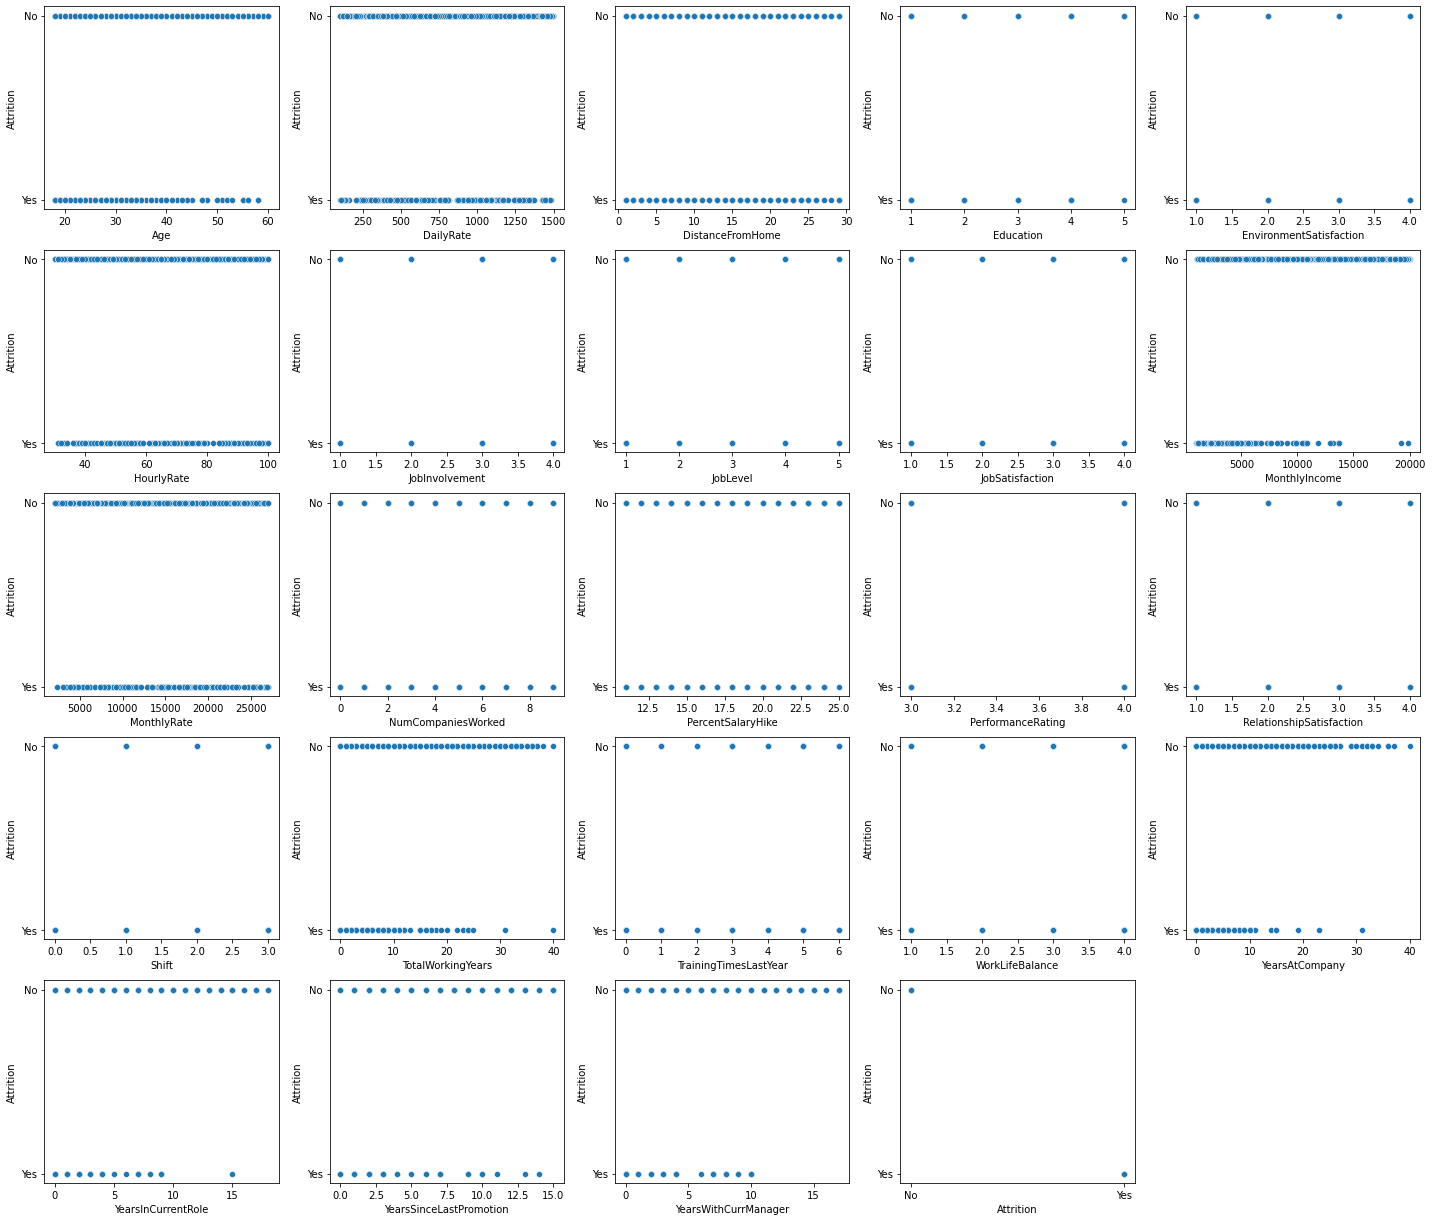

In [21]:
num_col["Attrition"] = df.Attrition
fig = plt.figure(figsize=(20,20))
for index in range(len(num_col.columns)):
    plt.subplot(6,5,index + 1)
    sns.scatterplot(x = num_col.iloc[:,index],y="Attrition",data = num_col)
    
fig.tight_layout(pad = 1.0)

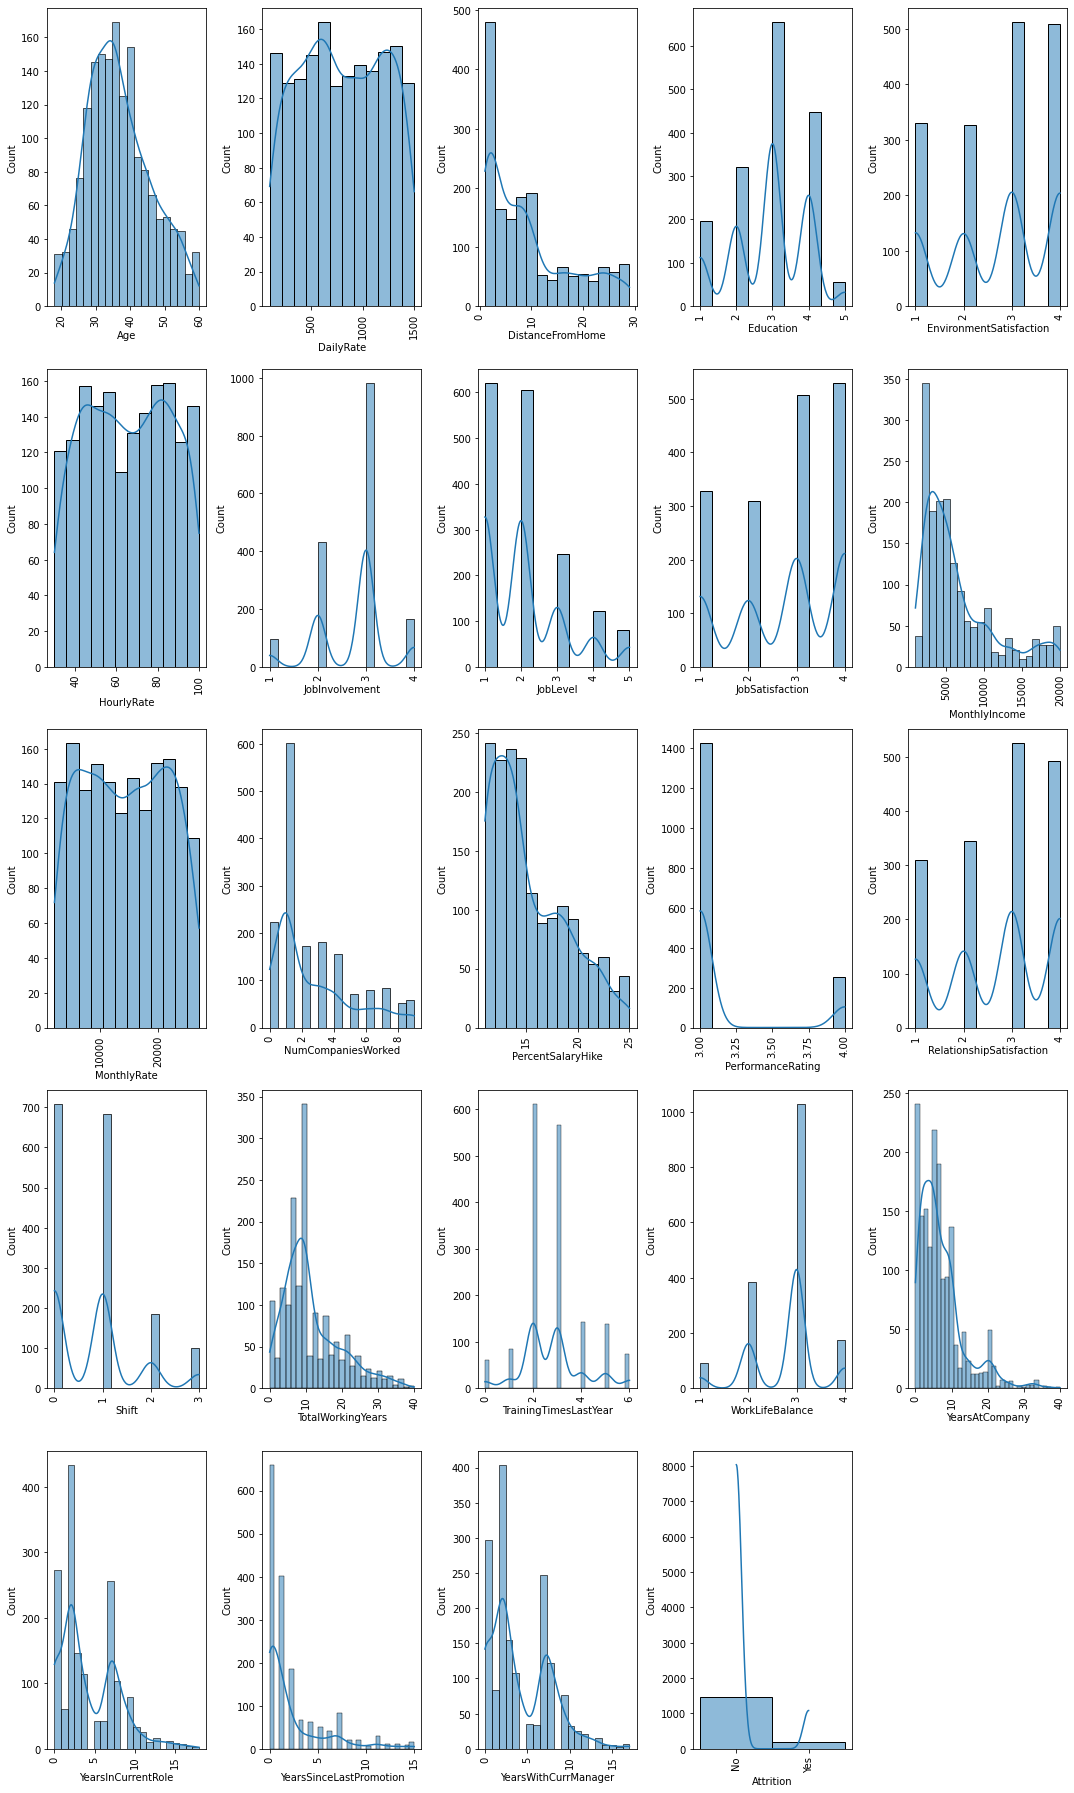

In [20]:
plt.figure(figsize=(15,25))
for index,column in enumerate(num_col):
    plt.subplot(5,5,index+1)
    sns.histplot(data=num_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

In [ ]:
# listCategorialColumns = df.select_dtypes(include = 'object').columns.to_list()
# labelencoder = LabelEncoder()
# for i in listCategorialColumns:
#     df[i] = labelencoder.fit_transform(df[i])

In [ ]:
# X = df.drop("Attrition",axis = 1)
# y =  df["Attrition"]

In [ ]:
# print(X.columns)
# print(X.shape)

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)
# X_scaled=pd.DataFrame(X_scaled)
# X_scaled.head()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [ ]:
# print("Training size: ", len(X_train))
# print("Testing size: ", len(X_test))